In [56]:
import tweepy
import numpy as np
import pandas
import os
import re
import seaborn as sns
from matplotlib import pyplot as plt

from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)  
                    
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

sns.set()

In [64]:
for status in tweepy.Cursor(api.search, q="Analyze AND @tcbbot OR analyze AND @tcbbot", tweet_mode='extended').items(1):
    tweet = status._json
    
    stripped_tweet = tweet['full_text'].strip('@tcbbot ')
    split_tweet = stripped_tweet.split(' ')
    target_user = split_tweet[-1].strip('@')
    
    mentioner = tweet['user']['screen_name'].replace("'", "")

TweepError: [{'code': 226, 'message': "This request looks like it might be automated. To protect our users from spam and other malicious activity, we can't complete this action right now. Please try again later."}]

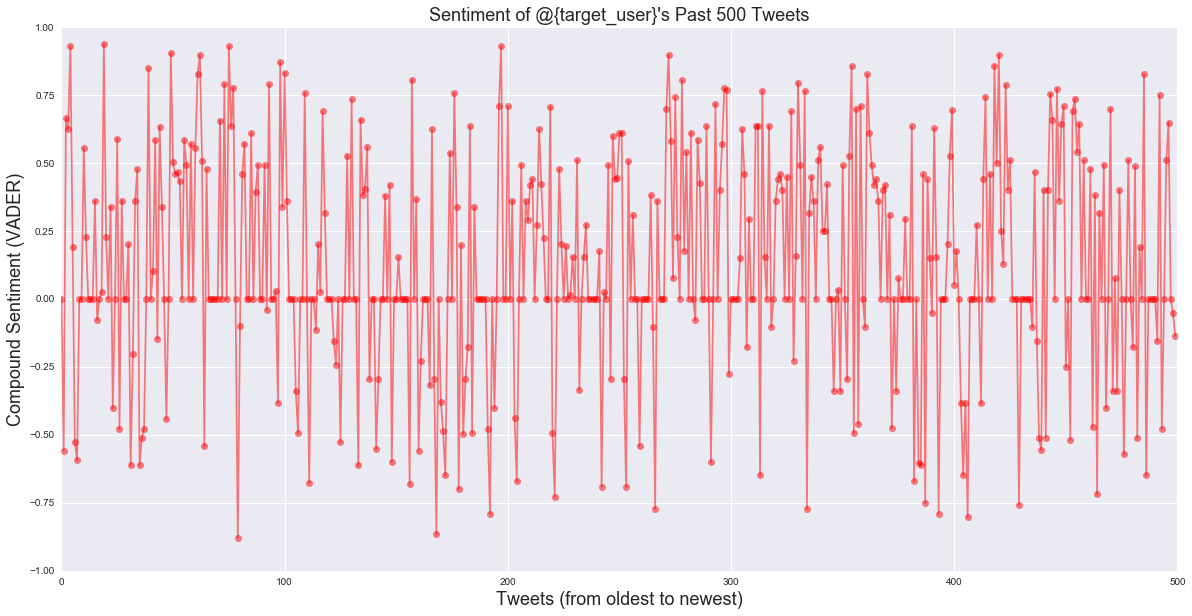

In [60]:
try:
    compound_list = []

    if mentioner in set(checked_list):
        api.update_status(f"Sorry @{mentioner}, someone has already plotted that - that plot is here:")

    else:
        for status in tweepy.Cursor(api.user_timeline, id=target_user, tweet_mode='extended').items(500):
            target_user_tweet = status._json
            results = analyzer.polarity_scores(target_user_tweet["full_text"])
            compound = results["compound"]
            compound_list.append(compound)

        user_plot, comp = plt.subplots(figsize=(20, 10))

        plot_title_fonts = {'family':'sans-serif', 'size':18}

        comp.set_title(f"Sentiment of @{target_user}'s Past 500 Tweets", fontdict=plot_title_fonts)
        comp.set_xlabel('Tweets (from oldest to newest)', fontdict=plot_title_fonts)
        comp.set_ylabel('Compound Sentiment (VADER)', fontdict=plot_title_fonts)
        comp.set_xlim(0,500)
        comp.set_ylim(-1,1)

        plot_filename = f"{target_user}_500_sentiment_plot.png"
        plot_path = os.path.join("saved-figs", plot_filename)
        comp.plot(range(len(compound_list)), compound_list, marker='o', color='red', mec='black', alpha=0.5)
        plt.savefig(plot_path, dpi=300)

        api.update_with_media(f"{plot_path}",
                        f"Here is your plot of the compound sentiment for @{target_user}'s past 500 tweets:")
except:
    continue
    
time.sleep(300)

In [12]:
handle_location = re.match('/(^|[^@\w])@(\w{1,15})\b/', stripped_tweet).group(0)
handle_location

AttributeError: 'NoneType' object has no attribute 'group'

In [ ]:
type(handle_location)

In [ ]:
stripped_tweet

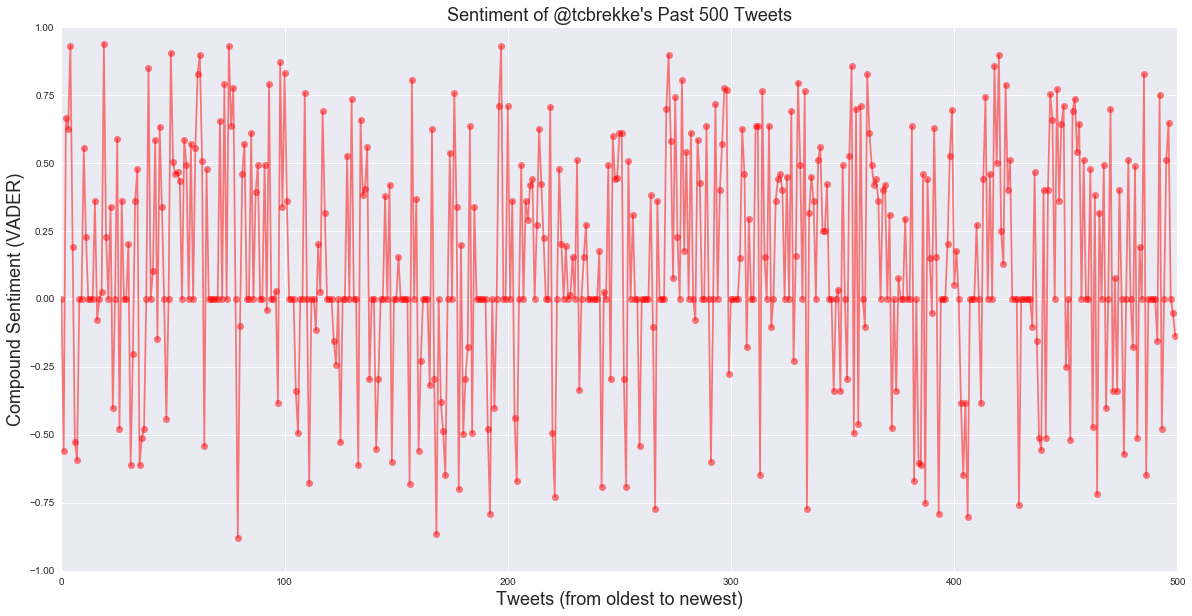

In [63]:
user_plot, comp = plt.subplots(figsize=(20, 10))

plot_title_fonts = {'family':'sans-serif', 'size':18}

comp.set_title(f"Sentiment of @{target_user}'s Past 500 Tweets", fontdict=plot_title_fonts)
comp.set_xlabel('Tweets (from oldest to newest)', fontdict=plot_title_fonts)
comp.set_ylabel('Compound Sentiment (VADER)', fontdict=plot_title_fonts)
comp.set_xlim(0,500)
comp.set_ylim(-1,1)
comp.legend(f"{target_user}")

plot_filename = f"{target_user}_500_sentiment_plot.png"
plot_path = os.path.join("saved-figs", plot_filename)
comp.plot(range(len(compound_list)), compound_list, marker='o', color='red', mec='black', alpha=0.5)
plt.savefig(plot_path, dpi=300)

'tcbrekke'

NameError: name 'time' is not defined

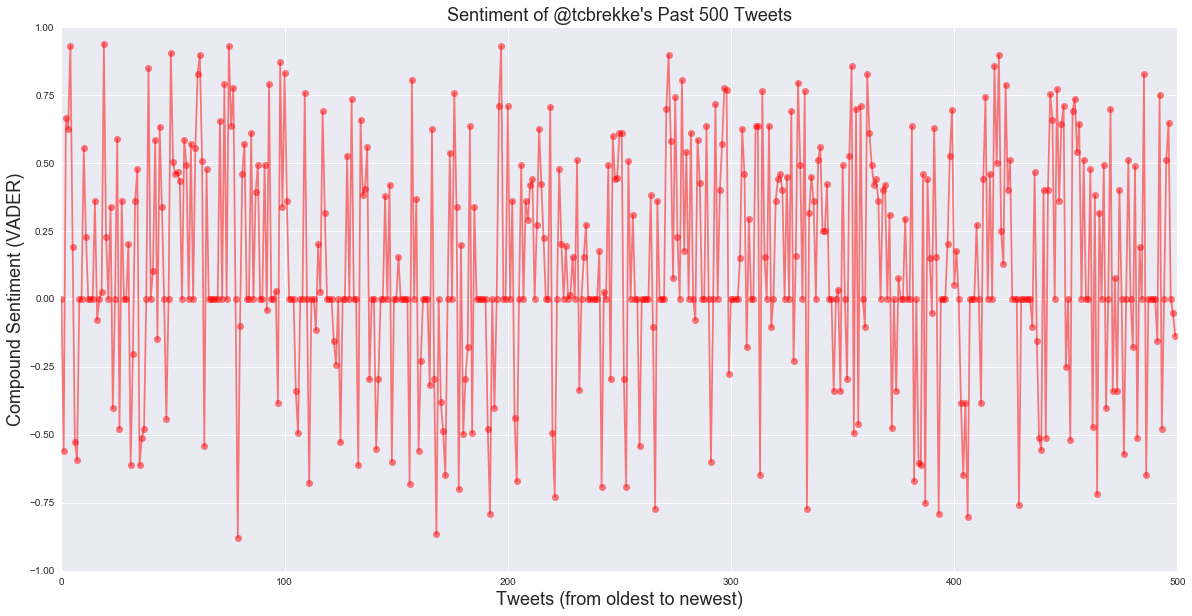

In [65]:
import tweepy
import numpy as np
import pandas
import os
import re
import seaborn as sns
from matplotlib import pyplot as plt

from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)  
                    
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

sns.set()

for status in tweepy.Cursor(api.search, q="Analyze AND @tcbbot OR analyze AND @tcbbot", tweet_mode='extended').items(5):
    tweet = status._json
    
    stripped_tweet = tweet['full_text'].strip('@tcbbot ')
    split_tweet = stripped_tweet.split(' ')
    target_user = split_tweet[-1].strip('@')
    
    mentioner = tweet['user']['screen_name'].replace("'", "")
    
    try:
        compound_list = []

        if mentioner in set(checked_list):
            api.update_status(f"Sorry @{mentioner}, someone has already plotted that - that plot is here:")

        else:
            for status in tweepy.Cursor(api.user_timeline, id=target_user, tweet_mode='extended').items(500):
                target_user_tweet = status._json
                results = analyzer.polarity_scores(target_user_tweet["full_text"])
                compound = results["compound"]
                compound_list.append(compound)

            user_plot, comp = plt.subplots(figsize=(20, 10))

            plot_title_fonts = {'family':'sans-serif', 'size':18}

            comp.set_title(f"Sentiment of @{target_user}'s Past 500 Tweets", fontdict=plot_title_fonts)
            comp.set_xlabel('Tweets (from oldest to newest)', fontdict=plot_title_fonts)
            comp.set_ylabel('Compound Sentiment (VADER)', fontdict=plot_title_fonts)
            comp.set_xlim(0,500)
            comp.set_ylim(-1,1)

            plot_filename = f"{target_user}_500_sentiment_plot.png"
            plot_path = os.path.join("saved-figs", plot_filename)
            comp.plot(range(len(compound_list)), compound_list, marker='o', color='red', mec='black', alpha=0.5)
            plt.savefig(plot_path, dpi=300)

            api.update_with_media(f"{plot_path}",
                            f"Here is your plot of the compound sentiment for @{target_user}'s past 500 tweets:")
    except:
        continue

time.sleep(300)